<a href="https://colab.research.google.com/github/SheilKumar/DynamicSystemRNNs/blob/master/DynamicSystems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="center">
  <td align="center"><a target="_blank" href="https://colab.research.google.com/drive/1FS3cBYRf83HTWo6J88kKAQr4kjgoIw_C#scrollTo=LfELTXphq6Ps">
        <img src="http://introtodeeplearning.com/images/colab/colab.png?v2.0"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
  <td align="center"><a target="_blank" href="https://github.com/SheilKumar/DynamicSystemRNNs">
        <img src="http://introtodeeplearning.com/images/colab/github.png"  height="70px" style="padding-bottom:5px;"  />View Source on GitHub</a></td>
</table>


In [32]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from google.colab import drive

In [33]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 10;

<IPython.core.display.Javascript object>

___
# 1.0 Lorentz System 
___
The first system we will attempt to train our network to predict is the **Lorentz System**:

![Alt Text](https://upload.wikimedia.org/wikipedia/commons/1/13/A_Trajectory_Through_Phase_Space_in_a_Lorenz_Attractor.gif)


 

# 1.1 Simulation of Lorentz System 
___

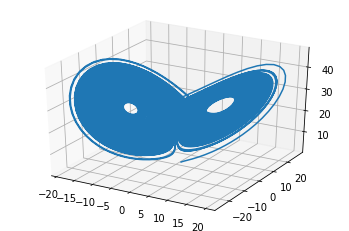

In [3]:
rho = 28.0
sigma = 10.0
beta = 8.0 / 3.0

def f(state, t):
    x, y, z = state  # Unpack the state vector
    return sigma * (y - x), x * (rho - z) - y, x * y - beta * z  # Derivatives

state0 = [1.0, 1.0, 1.0]
t = np.arange(0.0, 300.0, 0.01)

states = odeint(f, state0, t)

fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(states[:, 0], states[:, 1], states[:, 2])
plt.draw()
plt.show()

# 1.2 Training a Network 

In order to train an RNN, we need to first generate and split data from the Lorentz system into a training and testing set. We then need to create the structure of the LSTM that will be used. Finally we need to train the RNN and evaluate its results.



## 1.2.1 Generate and Split Data


In [ ]:
# Genereate data
# create vectors of the first 5 states and expected vector of the 6th state 
Data = [[states[i+j]/(100/0.1) for i in range(5)] for j in range(len(states)-5)] # Dividing by (100/0.1) to normalize the data
Target = [states[i+5]/(100/0.1) for i in range(len(states)-5)]
data = np.array(Data, dtype=float)
target = np.array(Target, dtype=float)
print(data.shape,target.shape)

(9995, 5, 3) (9995, 3)


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

## 1.2.2 Create Model

In [ ]:
model=Sequential()
model.add(LSTM((3),batch_input_shape=(None,5,3),return_sequences=True))
model.add(LSTM((3),return_sequences=False))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 5, 3)              84        
_________________________________________________________________
lstm_3 (LSTM)                (None, 3)                 84        
Total params: 168
Trainable params: 168
Non-trainable params: 0
_________________________________________________________________


## 1.2.3 Train Model 

In [ ]:
history = model.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
250/250 [==============================] - 2s 8ms/step - loss: 0.0062 - accuracy: 0.9854 - val_loss: 0.0047 - val_accuracy: 0.9790
Epoch 2/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0026 - accuracy: 0.9829 - val_loss: 0.0018 - val_accuracy: 0.9800
Epoch 3/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0017 - accuracy: 0.9859 - val_loss: 0.0016 - val_accuracy: 0.9810
Epoch 4/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9864 - val_loss: 0.0016 - val_accuracy: 0.9805
Epoch 5/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0016 - accuracy: 0.9865 - val_loss: 0.0015 - val_accuracy: 0.9755
Epoch 6/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0015 - accuracy: 0.9836 - val_loss: 0.0014 - val_accuracy: 0.9830
Epoch 7/50
250/250 [==============================] - 1s 5ms/step - loss: 0.0014 - accuracy: 0.9852 - val_loss: 0.0015 - val_accuracy: 0.9835
Epoch 

## 1.2.4 Evaluate Model

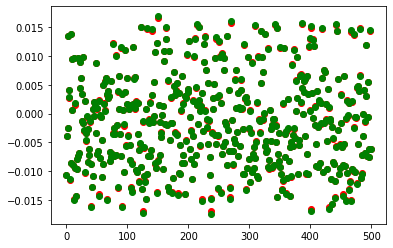

In [ ]:
results = model.predict(x_test)
#x values
plt.scatter(range(500),results[0:500,0],c='r')
plt.scatter(range(500),y_test[0:500,0],c='g')
plt.show()

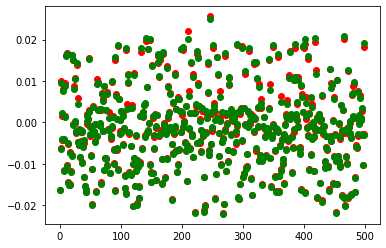

In [ ]:
#y values
plt.scatter(range(500),results[0:500,1],c='r')
plt.scatter(range(500),y_test[0:500,1],c='g')
plt.show()

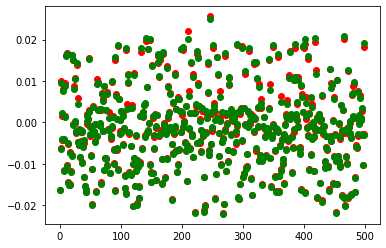

In [ ]:
#z values
plt.scatter(range(500),results[0:500,1],c='r')
plt.scatter(range(500),y_test[0:500,1],c='g')
plt.show()

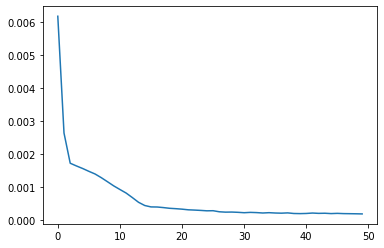

In [ ]:
plt.plot(history.history['loss'])
plt.show()

As can be seen by the two plots, our model is able to predict the next state of the system with great accuracy and the loss is almost stagnant by 40 epochs. 


## 1.2.5 Closing the Loop 

We will attempt to use the model to complete the loop and attain a similar image as shown in section 1.1


In [ ]:
np.array(Data).shape

(9995, 5, 3)

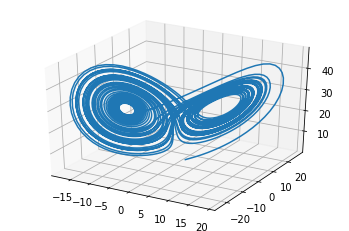

In [ ]:
x_range = np.array(Data[0:5000])
y_range = model.predict(x_range)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_range[:, 0]*1000, y_range[:, 1]*1000, y_range[:, 2]*1000)
plt.draw()
plt.show()


In [ ]:
new_data = np.array([[y_range[i+j]for i in range(5)] for j in range(1)])
y_new = []
new_data

array([[[0.00121182, 0.0041366 , 0.00042301],
        [0.00134268, 0.00455272, 0.00043535],
        [0.00149383, 0.0049934 , 0.00045729],
        [0.00166685, 0.0054663 , 0.00049088],
        [0.0018637 , 0.00597883, 0.00053873]]], dtype=float32)

In [ ]:
states[-6:],current

(array([[-0.9851114 , -0.45707432, 19.38416065],
        [-0.93874375, -0.53730929, 18.8787934 ],
        [-0.90443019, -0.61776601, 18.38725735],
        [-0.88107335, -0.69904945, 17.9092039 ],
        [-0.86774143, -0.78183539, 17.44431881],
        [-0.86365852, -0.86685874, 16.99232005]]),
 array([[[-0.9851114 , -0.45707432, 19.38416065],
         [-0.93874375, -0.53730929, 18.8787934 ],
         [-0.90443019, -0.61776601, 18.38725735],
         [-0.88107335, -0.69904945, 17.9092039 ],
         [-0.86774143, -0.78183539, 17.44431881]]]))

In [ ]:

current = np.array([states[-6:-1]])/1000
model.predict(current)*1000-states[-1]

array([[0.02345524, 0.03303184, 0.10796071]])

In [ ]:
hist=30
current = np.array([states[-hist:-hist+5]])/1000
for i in range(hist-5):
  current[0,:4]= current[0,1:]
  current[0,4] = model.predict(current)
  print(current[0,4])

[-0.00605847  0.0002362   0.03157734]
[-0.00532835  0.00059735  0.03046469]
[-0.00462822  0.00084759  0.02937784]
[-0.00392169  0.00101725  0.02826711]
[-0.00319477  0.00110922  0.02713223]
[-0.00264629  0.00118601  0.02611662]
[-0.00214846  0.00121999  0.02514509]
[-0.00169366  0.00122089  0.02420934]
[-0.00129121  0.00120438  0.02331793]
[-0.00095535  0.00119136  0.02248116]
[-0.00066226  0.0011727   0.02168561]
[-0.00040739  0.00115384  0.02092826]
[-0.00018812  0.00114207  0.02020858]
[-7.97286646e-08  1.14218041e-03  1.95247047e-02]
[0.0001635  0.00115392 0.01887258]
[0.00030714 0.0011805  0.01825005]
[0.00043521 0.00122531 0.01765543]
[0.00055203 0.00129098 0.01708688]
[0.00066175 0.00137974 0.01654265]
[0.00076835 0.0014948  0.01602155]
[0.00087578 0.00163965 0.01552272]
[0.00098785 0.00181806 0.01504556]
[0.00110842 0.00203424 0.01458988]
[0.00124149 0.00229318 0.01415603]
[0.00139122 0.00260048 0.01374497]


In [ ]:
new_data, model.predict(new_data)

(array([[[0.00121182, 0.0041366 , 0.00042301],
         [0.00134268, 0.00455272, 0.00043535],
         [0.00149383, 0.0049934 , 0.00045729],
         [0.00166685, 0.0054663 , 0.00049088],
         [0.0018637 , 0.00597883, 0.00053873]]], dtype=float32),
 array([[0.0026922 , 0.00934196, 0.00026986]], dtype=float32))

In [ ]:
y_range[:7]

array([[0.00121182, 0.0041366 , 0.00042301],
       [0.00134268, 0.00455272, 0.00043535],
       [0.00149383, 0.0049934 , 0.00045729],
       [0.00166685, 0.0054663 , 0.00049088],
       [0.0018637 , 0.00597883, 0.00053873],
       [0.00208665, 0.00653829, 0.00060418],
       [0.00233834, 0.00715194, 0.00069139]], dtype=float32)

In [ ]:
y_new=[]
#giving the model only 5 previous states
for i in range(50):
  y_n = np.array(model.predict(new_data))
  new_data[0][0:3] = new_data[0][1:4]
  new_data[0][4] = y_n
  y_new.append(y_n)
 

In [ ]:
y_range[:7]

array([[0.00121182, 0.0041366 , 0.00042301],
       [0.00134268, 0.00455272, 0.00043535],
       [0.00149383, 0.0049934 , 0.00045729],
       [0.00166685, 0.0054663 , 0.00049088],
       [0.0018637 , 0.00597883, 0.00053873],
       [0.00208665, 0.00653829, 0.00060418],
       [0.00233834, 0.00715194, 0.00069139]], dtype=float32)

In [ ]:
y_new = np.array(y_new)
new_data

array([[[0.00166685, 0.0054663 , 0.00049088],
        [0.00166685, 0.0054663 , 0.00049088],
        [0.00166685, 0.0054663 , 0.00049088],
        [0.00166685, 0.0054663 , 0.00049088],
        [0.00336714, 0.01122822, 0.00056653]]], dtype=float32)

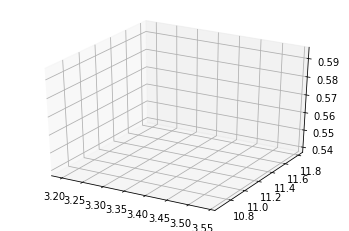

In [ ]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_new[:, 0,0]*1000, y_new[:,0,1]*1000, y_new[:,0,2]*1000)
plt.draw()
plt.show()

In [ ]:
#giivng the model 100 previous states
new_data = np.array([[y_range[i+j]for i in range(5)] for j in range(100)])
y_new = []

In [ ]:
for i in range(5000):
  y_n = np.array(model.predict(new_data))
  new_data[0:98] = new_data[1:99]
  new_data[99][0:3] = new_data[99][1:4]
  new_data[99][4] = y_n[-1]
  y_new.append(y_n[-1])
 

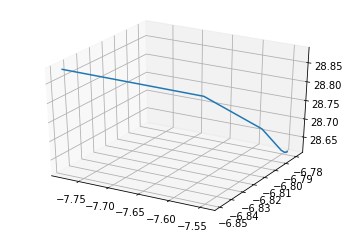

In [ ]:
y_new = np.array(y_new)
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(y_new[:,0]*1000, y_new[:,1]*1000, y_new[:,2]*1000)
plt.draw()
plt.show()

# 2.0 Rethinking the Network

In the previous iteration of our LSTM, our input consisted of the 5 previous states of the system, and we attempted to predict the next state from those previous states. As we saw from our result, while it worked well with the training data and the testing data. The network was unable to "close the loop"; it was unable to correctly reproduce the very first figure shown in **Section 1.1 Simulation of Lorentz System**. Therefore we must come up with a new idea for the network  

# 2.1 Changing the output

Now we will attempt to change the network such that it is trained to figure out the delta between the current and next states. That is, given states $A_1,A_2,...,A_n$ we will train the network to predict $A_{n+1}-A_n$. Our hope is that this methodology will make better use of the LSTM's architecture, that is, we hope that the LSTM's **gates** are more readily used to train the network more effectively. 


In [ ]:
#To generate new data, we can continue to use `states` from 1.1
# create vectors of the first A_1,..,A_n states, and target vector which is A_{n+1}-A_n 
n = 100     #length of each input vector
s = 1000    #number of input vectors
Data = np.array([[states[i+j] for i in range(n)] for j in range(s)])
Target = np.array([states[i+n]-states[i+n-1] for i in range(s)])
Data.shape, Target.shape
#[samples, time steps, features(x,y,z)]

((1000, 100, 3), (1000, 3))

In [ ]:
Data[0][n-1], states[100]-states[99], Target[0] #checking the data is exactly what we want

(array([-9.47503109, -8.56961651, 29.34727966]),
 array([0.09646113, 0.21258277, 0.01504564]),
 array([0.09646113, 0.21258277, 0.01504564]))

In [ ]:
#split data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(Data,Target,test_size=0.2,random_state=4)
x_train.shape, x_test.shape

((800, 100, 3), (200, 100, 3))

In [ ]:
model2 = Sequential()
model2.add(
    keras.layers.LSTM(units=50,return_sequences=True)
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(
    keras.layers.LSTM(units=50)
)
model2.add(keras.layers.Dropout(rate=0.2))
model2.add(keras.layers.Dense(units=3))
model2.compile(loss="mean_squared_error", optimizer="adam")


In [ ]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 100, 50)           10800     
_________________________________________________________________
dropout_6 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 153       
Total params: 31,153
Trainable params: 31,153
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_model2 = model2.fit(x_train,y_train,epochs=50,validation_data=(x_test,y_test),shuffle=False)

Epoch 1/50
25/25 [==============================] - 3s 112ms/step - loss: 0.0521 - val_loss: 0.0092
Epoch 2/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0145 - val_loss: 0.0040
Epoch 3/50
25/25 [==============================] - 2s 72ms/step - loss: 0.0084 - val_loss: 0.0029
Epoch 4/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0073 - val_loss: 7.5661e-04
Epoch 5/50
25/25 [==============================] - 2s 68ms/step - loss: 0.0055 - val_loss: 0.0010
Epoch 6/50
25/25 [==============================] - 2s 69ms/step - loss: 0.0051 - val_loss: 5.1427e-04
Epoch 7/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0044 - val_loss: 5.4258e-04
Epoch 8/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0040 - val_loss: 3.7131e-04
Epoch 9/50
25/25 [==============================] - 2s 71ms/step - loss: 0.0033 - val_loss: 3.4688e-04
Epoch 10/50
25/25 [==============================] - 2s 70ms/step - loss: 0.0035 - val_l

In [ ]:
y_pred2 = model2.predict(x_test)
y_pred2[20], y_test[20]

(array([-0.13041408, -0.3052252 , -0.16179709], dtype=float32),
 array([-0.14009924, -0.31642072, -0.15062558]))

In [ ]:
np.array(f(x_test[20][-1],1))*0.01,yt

array([-0.13126086, -0.30890887, -0.16667259])

 ## 2.1.1 Predicting on Unseen Data


In [ ]:
# we need to create new data to see how 
np.random.seed(400)
random_numbers = np.random.randint(1500,2000,size=50)
new_data = np.array([[states[i+j] for i in range(n)] for j in random_numbers])
new_target = np.array([states[i+n]-states[i+n-1] for i in random_numbers])
random_pred = model2.predict(new_data)
x = 0
new_data[x][-1],random_pred[32],new_target[32]

(array([ 5.58202959,  1.5154722 , 28.96029903]),
 array([-0.06393695, -0.24759689, -0.5625854 ], dtype=float32),
 array([0.30428007, 0.48494473, 0.00615552]))

In [ ]:
random_numbers

array([1848, 1963, 1818, 1941, 1640, 1999, 1907, 1762, 1745, 1636, 1607,
       1691, 1698, 1527, 1858, 1787, 1662, 1501, 1667, 1770, 1581, 1825,
       1678, 1523, 1777, 1706, 1760, 1855, 1677, 1870, 1898, 1736, 1808,
       1805, 1695, 1957, 1917, 1968, 1718, 1906, 1785, 1753, 1863, 1992,
       1928, 1960, 1885, 1537, 1740, 1622])

# 2.1.2 Evaluation 

It seems to be that the LSTM is still unable to accurately predict on unseen data. I believe that the reason for this might be due to the ranges of the values of the data being too great. So now we will attempt to use a scaler to transform all the values of the data t values between 0 and 1 and then inverse transform the values back after modelling. 


In [ ]:
z = np.array([0,12,4,546,5,3]).reshape(-1,1)
scaler = MinMaxScaler()
scaler.fit_transform(z)
scaler.inverse_transform(np.array([0.05,0.06,0.3,0.4]).reshape(-1,1))

array([[ 27.3 ],
       [ 32.76],
       [163.8 ],
       [218.4 ]])

In [ ]:
z.shape

(1000, 100)

In [ ]:
def generator2():
    for i in range(10):
        yield i

o = generator2()
o

<generator object generator2 at 0x7fad38033f10>

In [ ]:
for i in o:
  print(i)

0
1
2
3
4
5
6
7
8
9


In [ ]:
o.__next__()

0

This range is too much for the LSTM to be trained on we need to scale values between 0 and 1 or -1 and 1. So that the network is able to learn better.

# 3.1 Creating from scratch 

**1.** Generate Window function 

* Input:
    * Data (Complete Dataset)
    * Batch Size
    * Time Steps 

* Output:
    * X and Y Datasets 

In [4]:
def get_window(data,batch_size, time_steps,start_id=1):
  x_data = np.array([data[i+start_id:i+start_id+time_steps] for i in range(batch_size) ])
  y_data = np.array([data[i+start_id+1:i+start_id+time_steps+1]-data[i+start_id:i+start_id+time_steps]for i in range(batch_size)])
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=False)
  return x_train,x_test,y_train,y_test

In [5]:
#testin get_window
np.random.seed(2808)
x_train,x_test,y_train,y_test = get_window(states,16000,1)

In [6]:
x_train.shape,y_train.shape

((12800, 1, 3), (12800, 1, 3))

In [7]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    # Shape => [batch, time, features]
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=3)
])

In [8]:
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])

In [9]:
history = lstm_model.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test))

Epoch 1/30
400/400 [==============================] - 3s 7ms/step - loss: 0.0263 - mean_absolute_error: 0.0887 - val_loss: 0.0075 - val_mean_absolute_error: 0.0503
Epoch 2/30
400/400 [==============================] - 3s 6ms/step - loss: 0.0039 - mean_absolute_error: 0.0372 - val_loss: 0.0033 - val_mean_absolute_error: 0.0380
Epoch 3/30
400/400 [==============================] - 3s 6ms/step - loss: 0.0022 - mean_absolute_error: 0.0278 - val_loss: 0.0019 - val_mean_absolute_error: 0.0239
Epoch 4/30
400/400 [==============================] - 3s 7ms/step - loss: 0.0016 - mean_absolute_error: 0.0238 - val_loss: 0.0013 - val_mean_absolute_error: 0.0202
Epoch 5/30
400/400 [==============================] - 3s 6ms/step - loss: 0.0014 - mean_absolute_error: 0.0227 - val_loss: 0.0016 - val_mean_absolute_error: 0.0222
Epoch 6/30
400/400 [==============================] - 3s 6ms/step - loss: 0.0011 - mean_absolute_error: 0.0202 - val_loss: 0.0020 - val_mean_absolute_error: 0.0289
Epoch 7/30
400/4

In [10]:
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (32, 1, 256)              266240    
_________________________________________________________________
dense (Dense)                (32, 1, 3)                771       
Total params: 267,011
Trainable params: 267,011
Non-trainable params: 0
_________________________________________________________________


In [11]:
lstm_model.predict(x_test)[1:10,:,:]+x_test[0:9,:,:], x_test[1:10,:,:]

(array([[[ 0.15464439,  0.13074906, 13.63781882]],
 
        [[ 0.15498489,  0.15188497, 13.27963978]],
 
        [[ 0.15734454,  0.17353598, 12.93092827]],
 
        [[ 0.16159532,  0.19598404, 12.59143432]],
 
        [[ 0.16764788,  0.219512  , 12.26091713]],
 
        [[ 0.17544853,  0.24440653, 11.93914432]],
 
        [[ 0.18497602,  0.27096214, 11.62589278]],
 
        [[ 0.19623947,  0.29948456, 11.32094764]],
 
        [[ 0.20927686,  0.33029452, 11.02410349]]]),
 array([[[ 0.15406079,  0.14730891, 13.64084142]],
 
        [[ 0.15442246,  0.16813303, 13.28213272]],
 
        [[ 0.15675517,  0.18949478, 12.93289765]],
 
        [[ 0.16093602,  0.21167275, 12.5928923 ]],
 
        [[ 0.16688028,  0.23494584, 12.2618807 ]],
 
        [[ 0.17453797,  0.25959663, 11.93963476]],
 
        [[ 0.1838911 ,  0.28591498, 11.62593429]],
 
        [[ 0.19495147,  0.31420174, 11.3205671 ]],
 
        [[ 0.20775906,  0.34477269, 11.02332919]]]))

## 3.2 Predicting on Random Data Again



In [12]:
new_data = get_window(states,100,100,2400)
x_new_data = new_data[0]
pred_new_data = lstm_model.predict(x_new_data)

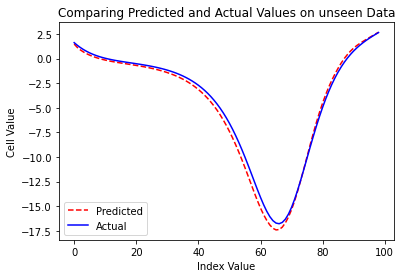

In [13]:
t = np.arange(0,99,1)

plt.plot(t,pred_new_data[0,1:100,0]+x_new_data[0,0:99,0],'r--',label='Predicted')
plt.plot(t,x_new_data[0,1:100,0],'b-',label='Actual')
plt.xlabel('Index Value')
plt.ylabel('Cell Value')
plt.title('Comparing Predicted and Actual Values on unseen Data')
plt.legend()
plt.show()

## 3.3 Closing the Loop


In [14]:
def teach_lstm(data,start_index,model,trans=400):
  for i in range(trans):
    model.predict(tf.expand_dims(tf.expand_dims(data[start_index-trans+i],0),0))
  return None

In [15]:
def close_loop(data,num_loops,model,start_index,trans=400):
  teach_lstm(data,start_index,model,trans)
  old_state = tf.expand_dims(tf.expand_dims(data[start_index],0),0)
  predicted_states = []
  for i in range(num_loops):
    new_state = model.predict(old_state)+old_state
    old_state = new_state
    predicted_states.append(np.squeeze(np.squeeze(old_state,0),0))
  return np.array(predicted_states)

In [24]:
init_state = 25000
loops = 100

In [25]:
test = close_loop(states,loops,lstm_model,init_state,400)

In [18]:
test-states[init_state:init_state+loops]

array([[ -0.77926362,  -1.85442102,  -0.25777733],
       [ -0.89252139,  -1.76692574,  -0.54605785],
       [ -0.98509607,  -1.63928323,  -0.7935996 ],
       ...,
       [-10.81606452, -10.51774791, -10.87051203],
       [-10.80929429, -11.07942215, -10.0737618 ],
       [-10.858489  , -11.69318756,  -9.22436965]])

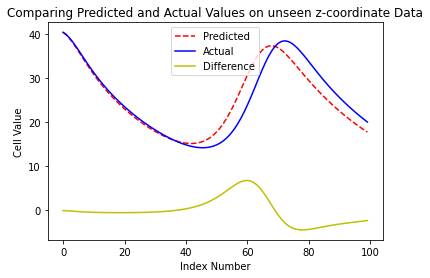

In [42]:
coord = 2

plt.plot(test[:,coord],'r--',label='Predicted')
plt.plot(states[init_state+1:init_state+loops+1,coord],'b-',label='Actual')
plt.plot(test[:,coord]-states[init_state+1:init_state+loops+1,coord],'y-',label="Difference")
plt.xlabel('Index Number')
plt.ylabel('Cell Value')
plt.title('Comparing Predicted and Actual Values on unseen z-coordinate Data')
plt.legend()
images_dir = '/content/gdrive/My Drive'
plt.savefig(f"{images_dir}/z_coord.png")
plt.show()

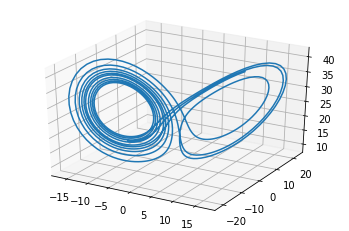

In [20]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(test[:,0], test[:, 1], test[:,2])
plt.draw()
plt.show()

# Progress Report 

This excerpt shall serve as a reminder for all the work done so far. It will also help guide further progress and can serve as a baseline if one is to forget anything moving forward.


## Data Structure 

```python
def get_window(data,batch_size, time_steps,start_id=1):
  x_data = np.array([data[i+start_id:i+start_id+time_steps] for i in range(batch_size) ])
  y_data = np.array([data[i+start_id+1:i+start_id+time_steps+1]-data[i+start_id:i+start_id+time_steps]for i in range(batch_size)])
  x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,shuffle=False)
  return x_train,x_test,y_train,y_test
```
Function used to create the data for training and testing. 

* **Inputs**: 
    * `data`: Array containing data from the Lorentz Attractor. 
    * `batch_size`: Number of training batches to be created.
    * `time_steps`: Number of consecutive time steps per batch.
    * `start_id`: Index number of `data` to begin creating training and testing sets from. 

![](https://i.imgur.com/oprpK6v.jpeg)

* **Outputs**
    * `x_train`: Input data to train the network.
    * `x_test`: Validation input data to test the network
    * `y_train`: Target data to train the network.
    * `y_test`: Validation target data to test the network.

## Network Architecture 

```python
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(256, return_sequences=True),
    # Shape => [batch, time, features]
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.Dense(units=3)
])
```


* Cell type: LSTM
* RNN Units: 256 
* Dense Layer: 3 Neurons 

## Training Parameters 
```python
lstm_model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(),
              metrics=[tf.metrics.MeanAbsoluteError()])
```
```python 
history = lstm_model.fit(x_train,y_train, epochs=30, validation_data=(x_test,y_test))
```

* Loss Function: Mean Squared Error
* Optimizer = Adam 
* Metric = Mean Absolute Error 
* Epochs: 30 


## Results 

The `teach_lstm` function is used to bring the LSTM internal state as close as possible to just before the data used for closing the loop. The `close_loop` function uses `teach_lstm` inside it before beginning to predicate states.

```python
def teach_lstm(data,start_index,model,trans=400):
  for i in range(trans):
    model.predict(tf.expand_dims(tf.expand_dims(data[start_index-trans+i],0),0))
  return None
```
```python
def close_loop(data,num_loops,model,start_index,trans=400):
  teach_lstm(data,start_index,model,trans)
  old_state = tf.expand_dims(tf.expand_dims(data[start_index],0),0)
  predicted_states = []
  for i in range(num_loops):
    new_state = model.predict(old_state)+old_state
    old_state = new_state
    predicted_states.append(np.squeeze(np.squeeze(old_state,0),0))
  return np.array(predicted_states)
```

* **Inputs**:
    * `data`: Array containing data from the Lorentz attractor. 
    * `num_loops`: Number of states to be predicted.
    * `model`: Model used to predict data.
    * `start_index`: Index number of `data to begin predicting from. (Reccomended to used indexes greater than 16000 so that the model has not seen the points yet)
    * `trans`: Number of previous states used to adjust the LSTM internal state. 

* **Outputs**:
    * `predicted_states`: An `np.array` of predicted states.

### Accuracy Tests 

Beginning with a starting index of 25000 and predicting 100 consecutive time steps. 

```python
init_state = 25000
loops = 100
test = close_loop(states,loops,lstm_model,init_state,400)
```


![](https://i.imgur.com/2zuy3Fx.png)
![](https://i.imgur.com/qs76LGF.png)
![](https://i.imgur.com/iGJGdHn.png)



